# DALL・E2

DALL・E2をOpenAIのAPI経由で使うコードです．指示した文章を元に画像を生成します．3種類のサイズを生成でき，一度に1〜10枚の画像を生成できます．

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/text_to_image/dall-e2.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import IPython.display as display
import os

client = OpenAI()

os.environ["OPENAI_API_KEY"] = "YOUR_API_KEY"


### 画像を生成する

In [9]:
response = client.images.generate(
    model="dall-e-2",
    prompt="a white siamese cat",
    n=1, # 1〜10枚まで設定できる
    # 三つのサイズを選択できる
    #size = "256x256",
    #size = "512x512",
    size="1024x1024"
)


In [13]:
# 生成した画像のURLを取得
image_url = response.data[0].url
response = requests.get(image_url)
response.raise_for_status()


### 画像の表示

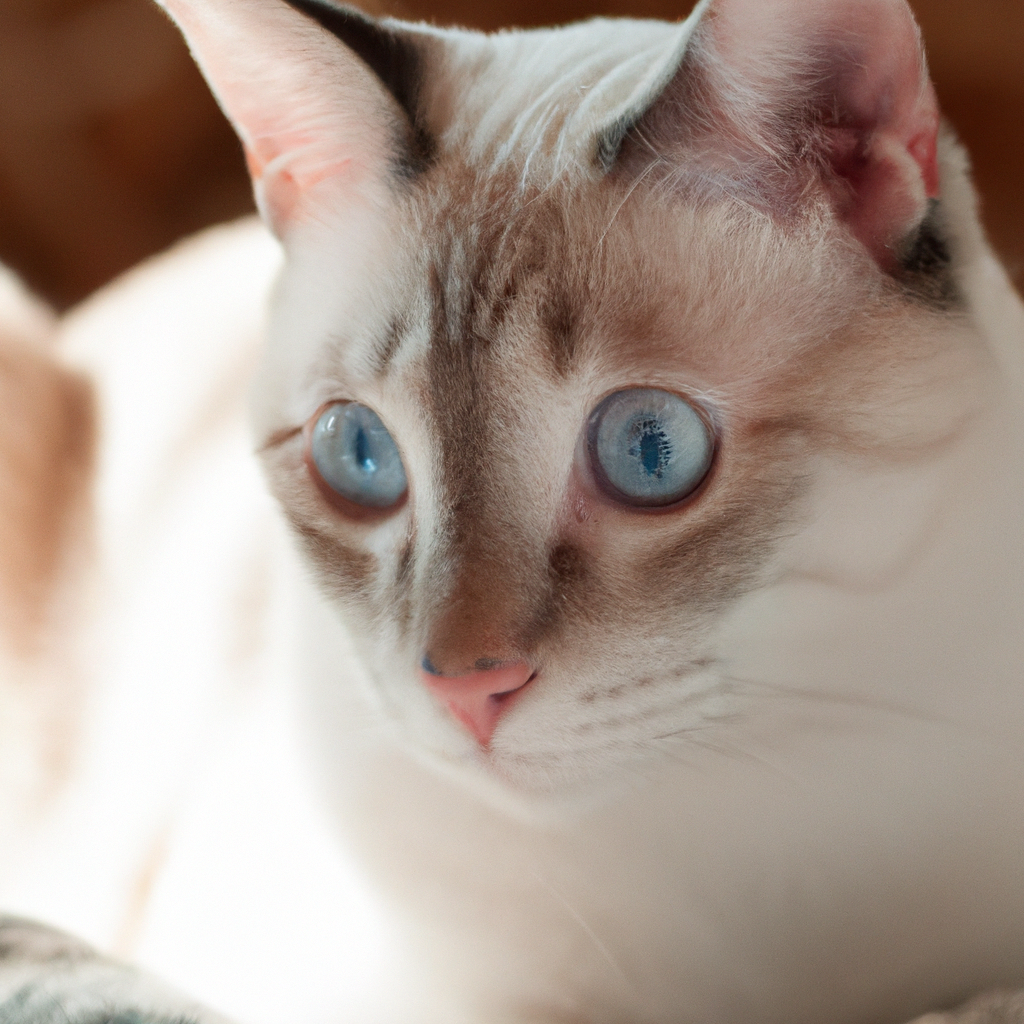

In [14]:
image_data = BytesIO(response.content)
image = Image.open(image_data)
display.display(image)


### 画像を保存する

In [15]:
with open('sample_image.png', 'wb') as file:
    file.write(response.content)
